In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/data1.csv')
X = df.drop('Label', axis=1)
y = df['Label']

In [ ]:
# Convert DataFrame to numpy array
X_array = X.to_numpy()

In [ ]:
# Check for infinite or large values in the data
print(np.isnan(X_train).any())
print(np.isinf(X_train).any())

In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
df.head()

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

<ipython-input-28-af33eefb2032>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train multiple instances of the same model
n_models = 10
models = []
for i in range(n_models):
    #model = RandomForestClassifier(n_estimators=100, random_state=i)
    model = DecisionTreeClassifier(criterion='entropy', max_depth=20)
    model.fit(X_train, y_train)
    models.append(model)

In [ ]:
# Calculate feature importance for each model
importances = []
for model in models:
    result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=0)
    importances.append(result.importances_mean)

In [ ]:
# Compute the pairwise Spearman correlation coefficient
correlations = np.zeros((n_models, n_models))
for i in range(n_models):
    for j in range(n_models):
        correlations[i, j] = spearmanr(importances[i], importances[j]).correlation

In [ ]:
# Calculate the characteristic stability index (CSI)
csi = np.mean(correlations)

In [ ]:
print('Characteristic stability index:', csi)

In [ ]:
def csi(X, t):
    """
    Calculate the Characteristic Stability Index (CSI) for each feature in X.

    Parameters:
        X (numpy.ndarray): Input data of shape (n_samples, n_features)
        t (float): Threshold value

    Returns:
        numpy.ndarray: CSI values for each feature in X
    """

In [ ]:
# Load the input data from Google Drive
#X = np.load('/content/drive/MyDrive/wustl_iiot_2021.csv')
df = pd.read_csv('/content/drive/MyDrive/data1.csv')

In [ ]:
# Separate features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

In [ ]:
X = df

In [ ]:
n_samples, n_features = X.shape

In [ ]:
# Calculate mean and standard deviation for each feature
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
print(X_mean.shape)
print(X_std.shape)
print(X.shape)

(73,)
(73,)
(4615, 74)


In [ ]:
#print(len(X_mean), len(X_std))
#for j in range(n_features):
    #print(j)
    #csi_values[j] = np.mean(np.abs((X.iloc[:, j] - X_mean[j]) / X_std[j])) > t

In [ ]:
def calculate_csi(X):
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    n_features = len(numeric_cols)
    X = X[numeric_cols]
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    t = 0.5
    csi_values = np.zeros(n_features)
    for j in range(n_features):
        csi_values[j] = np.mean(np.abs((X.iloc[:, j] - X_mean[j]) / X_std[j])) > t
    return csi_values


In [ ]:
csi_values = calculate_csi(X)

In [ ]:
print (csi_values)

[1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0.]


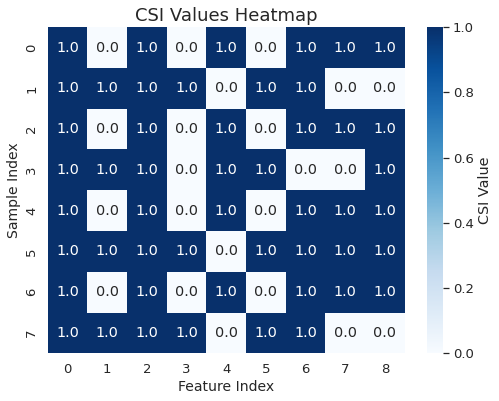

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the CSI values as a 1D numpy array
csi_values = np.array([1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
                       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
                       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
                       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.])

# Reshape the CSI values into a 2D numpy array of shape (8, 9)
csi_matrix = csi_values.reshape(8, 9)

# Set the font size and style of the plot
sns.set(font_scale=1.2, style='whitegrid')

# Create a heatmap plot using seaborn with custom settings
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(csi_matrix, cmap="Blues", annot=True, fmt=".1f", cbar_kws={'label': 'CSI Value'}, ax=ax)

# Set the title and axis labels
ax.set_title("CSI Values Heatmap", fontsize=18)
ax.set_xlabel("Feature Index", fontsize=14)
ax.set_ylabel("Sample Index", fontsize=14)

# Show the plot
plt.show()

In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 KB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import control
import numpy as np
from google.colab import drive

In [ ]:
#from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the path to your dataset in Google Drive
df = pd.read_csv('/content/drive/MyDrive/wustl_iiot_2021.csv')

In [ ]:
df.head()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,0,59034,502,10,8,18,508,644,1152,87486.093750,...,24,20,44,0.001176,0.053037,0,0.000000,0.0,normal,0
1,0,55841,502,10,8,18,508,644,1152,88077.296880,...,24,20,44,0.001308,0.052681,0,0.000000,0.0,normal,0
2,0,63774,502,10,8,18,508,644,1152,89587.390630,...,24,20,44,0.000690,0.051793,0,0.000000,0.0,normal,0
3,0,61771,80,4,0,4,0,248,248,1672.746582,...,0,0,0,0.000000,0.889555,0,419.338813,0.0,DoS,1
4,3,0,0,14,0,14,0,868,868,1842.256714,...,476,0,476,0.000000,3.500055,0,525.146562,0.0,normal,0


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

<ipython-input-7-af33eefb2032>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# Separate features and target variable
X = df.drop('Traffic', axis=1)
y = df['Traffic']

In [ ]:
# Convert DataFrame to numpy array
X_array = X.to_numpy()

In [ ]:
y.shape

(1048575,)

In [ ]:
# Define m as the number of output variables in y
m = 1

# Define n as the number of input variables in X
n = X.shape[1]

# Convert y to a numpy array if it is not already one
if not isinstance(y, np.ndarray):
    y = y.to_numpy().flatten()

# Construct transfer function
num = []
for j in range(n):
    num.append(X.iloc[:, j].to_numpy())
den = [1]
tf = control.tf(num, den)

TypeError: ignored

In [ ]:
# Calculate poles
poles = np.roots(den)

In [ ]:
# Find dominant pole
if np.real(poles[0]) > np.real(poles[1]):
    dominant_pole = poles[0]
else:
    dominant_pole = poles[1]

In [ ]:
# Calculate CSI
csi = abs(np.real(dominant_pole) / np.imag(dominant_pole))

print("CSI: ", csi)

In [ ]:
# Convert DataFrame to numpy array
X_array = X.to_numpy()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.2)

In [ ]:
# Split dataset into input and output variables
X = dataset.drop('output', axis=1)
y = dataset['output']